In [67]:
# Backtesting on SBIN.NS (State Bank of India)

In [68]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
#plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (20,10)
#plt.rcParams['axes.facecolor'] = 'grey'
#myplot + theme(panel.background = element_rect(fill='green', colour='red'))


In [69]:
import yfinance as yf

In [70]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [71]:
ticker = 'SBIN'                  # Stock Name
print(ticker) 
ticker = ticker + '.NS'          # .NS for stocks listed in NSE      
a1 = yf.Ticker(ticker)
df1 = a1.history(period="2500d" , interval = '1d')        

SBIN


In [72]:
df2 = df1.loc["2015-11-02" : "2015-12-02"]        # The duration where we are backtesting this stratregy

In [73]:
df = df2.drop(labels = ['High', 'Low', 'Dividends','Stock Splits'], axis = 1)  # Removing unneccesary columns from the dataframe

In [74]:
df      # Final dataframe

,Open,Close,Volume
Date,,,
2015-11-02,232.809077,231.733063,7611610
2015-11-03,234.129640,230.803787,8323201
2015-11-04,233.982897,233.787262,8418352
2015-11-05,232.809075,228.798492,8906564
2015-11-06,230.461432,237.700027,30821077
2015-11-09,230.852688,240.732407,22806485
2015-11-10,239.558568,235.939270,11767845
2015-11-13,236.232731,235.009995,9082062
2015-11-16,234.276360,242.884430,14051479


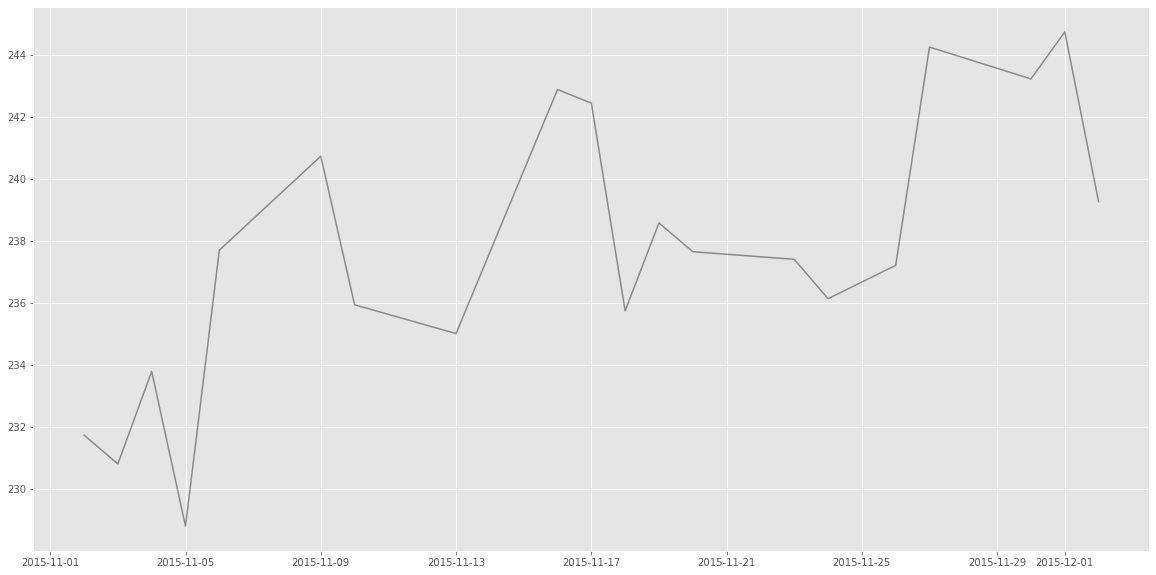

In [75]:
plt.plot(df['Close'] , alpha = 0.4 , color = 'black')    # Visualising stock movement during the desired period using matplotlib


In [76]:
# Simple Exponential Moving Average Strategy

short = 12     
long = 26

# This line defines the Short term and long term EMA. The span can altered by the user. I am using 12 Days and 26 Days EMA here

Short_Term_EMA = df["Close"].ewm(span=short).mean()       
Long_Term_EMA = df["Close"].ewm(span=short).mean()


df["STEMA"] = df["Close"].ewm(span=short).mean()     # These 2 lines add  columns 'STEMA' and 'LTEMA' to the dataframe
df["LTEMA"] = df["Close"].ewm(span=long).mean()      # STEMA and LTEMA stands for Short term and Long Term EMA respectively. 


df["Last Closing Price"] = df["Close"].shift(1)         # This Line adds previous day closing price to the dataframe
df["Change"] = df["Close"]/df["Last Closing Price"]     # Defining Change

df["Investment"] = [1 if df.loc[i, "STEMA"] > df.loc[i, "LTEMA"]  # This line codes for an investment iff STEMA > LTEMA. 
                        else 0 for i in df.index]                 # If STEMA > LTEMA Investment = 1 otherwise = 0

df

,Open,Close,Volume,STEMA,LTEMA,Last Closing Price,Change,Investment
Date,,,,,,,,
2015-11-02,232.809077,231.733063,7611610,231.733063,231.733063,NaN,NaN,0
2015-11-03,234.129640,230.803787,8323201,231.229705,231.250554,231.733063,0.995990,0
2015-11-04,233.982897,233.787262,8418352,232.227920,232.161969,230.803787,1.012926,1
2015-11-05,232.809075,228.798492,8906564,231.145384,231.221688,233.787262,0.978661,0
2015-11-06,230.461432,237.700027,30821077,232.926257,232.724041,228.798492,1.038906,1
2015-11-09,230.852688,240.732407,22806485,234.823562,234.328053,237.700027,1.012757,1
2015-11-10,239.558568,235.939270,11767845,235.072528,234.614600,240.732407,0.980089,1
2015-11-13,236.232731,235.009995,9082062,235.059479,234.678308,235.939270,0.996061,1
2015-11-16,234.276360,242.884430,14051479,236.607532,235.894635,235.009995,1.033507,1


In [77]:

ema = df[df["Investment"] == 1]   #This line defines a new dataframe 'ema' which only consists of those points where we invest.
ema["Return"] = np.cumprod(ema["Change"])  # Using cumprod function we add our profit to previously earned profit.(Compounding)

ema

<ipython-input-77-e628b88a056b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ema["Return"] = np.cumprod(ema["Change"])  # Using cumprod function we add our profit to previously earned profit.(Compounding)


,Open,Close,Volume,STEMA,LTEMA,Last Closing Price,Change,Investment,Return
Date,,,,,,,,,
2015-11-04,233.982897,233.787262,8418352,232.227920,232.161969,230.803787,1.012926,1,1.012926
2015-11-06,230.461432,237.700027,30821077,232.926257,232.724041,228.798492,1.038906,1,1.052335
2015-11-09,230.852688,240.732407,22806485,234.823562,234.328053,237.700027,1.012757,1,1.065760
2015-11-10,239.558568,235.939270,11767845,235.072528,234.614600,240.732407,0.980089,1,1.044540
2015-11-13,236.232731,235.009995,9082062,235.059479,234.678308,235.939270,0.996061,1,1.040426
2015-11-16,234.276360,242.884430,14051479,236.607532,235.894635,235.009995,1.033507,1,1.075287
2015-11-17,244.547346,242.444244,11273394,237.713587,236.798417,242.884430,0.998188,1,1.073338
2015-11-18,242.199693,235.743637,10397889,237.353134,236.661612,242.444244,0.972362,1,1.043674
2015-11-19,237.748931,238.580383,7325199,237.571335,236.897363,235.743637,1.012033,1,1.056232


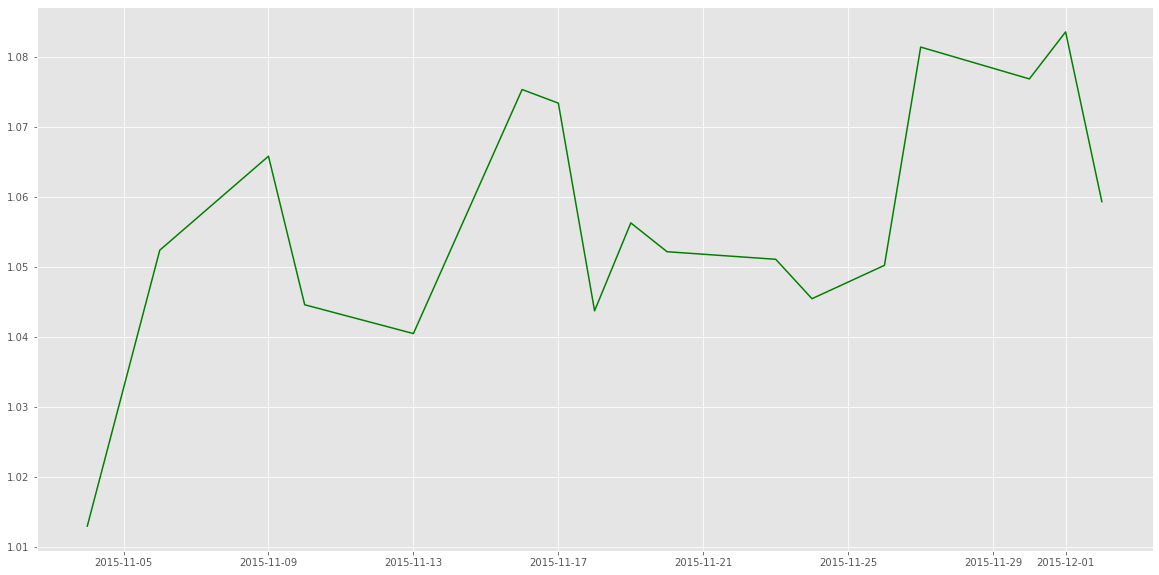

In [80]:
plt.plot(ema["Return"], color = 'green') # Plotting return using matplotlib




In [82]:

print("STEMA Stratregy :" + str(ema['Return'][-1]))   # Prints Backtest results. 



STEMA Stratregy :1.059263846847975
